In [1]:
import numpy as np
from astropy.table import Table, vstack
from astropy.io.fits import getdata
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from bma_validation_class import bmaValidation

small_infile = 'small_table.fits'
small_table = Table(getdata(small_infile))



Welcome to BMA Validation


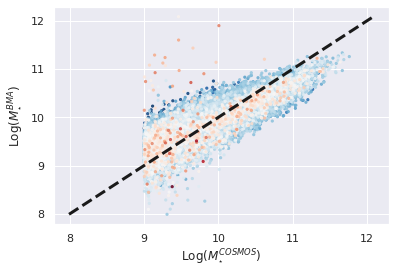

In [10]:

# put here below your plot functions

# Example of how to run
mass = small_table['mass']
mass_t= small_table['mass_t']
magi  = small_table['magi']
magi_true = small_table['magi_true']
z = small_table['z']
chisqr = small_table['chisqr']

mask = (z<=0.65)&(z>=0.2)&(magi<23.5)&(mass_t>9.)
variables = [mass,mass_t,magi,magi_true,z]

b1 = bmaValidation()
b1.add_model('baseline',*variables)

# # plot an identity plot
#b1.plot_identity_mass_redshift(mask=mask)

# # example: define new variables
b1.chisqr = np.log10(chisqr)
b1.plot_identity_mass_chisqr(mask=mask)


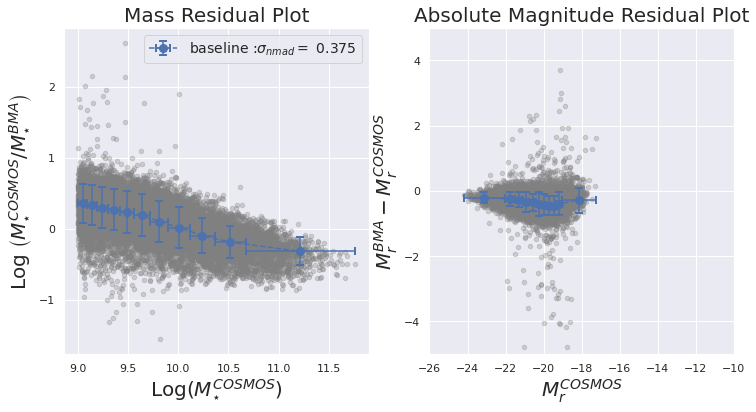

In [5]:
fig, axis = plt.subplots(1, 2, figsize=(12,6))

b1.plot_residual_mass('baseline', ax = axis[0], mask=mask)
b1.plot_residual_absolute_mag('baseline', ax = axis[1], mask=mask)
axis[0].legend(fontsize = 14)

In [6]:
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
point_estimates = np.load('point_estimates.npy')
mass_true = y_test[:,1]
mass = point_estimates[:]
mask_2 = (x_test[:,2]<23.5)&(y_test[:,0]<0.65)&(y_test[:,0]>0.2)&(mass_true>9.)

In [11]:
print(y_test.shape)

(10699, 2)


In [7]:
b2 = bmaValidation()
b2.add_model('galpro', mass, mass_true, mass, mass_true, y_test[:,0])

Welcome to BMA Validation


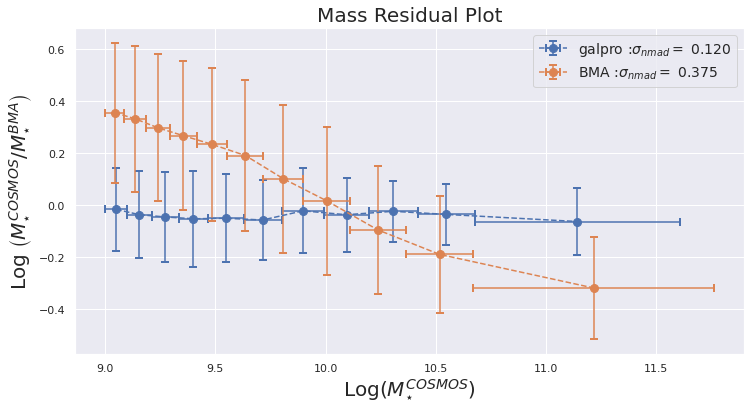

In [8]:
fig, axis = plt.subplots(1, 1, figsize=(12,6))

b2.plot_residual_mass('galpro', ax = axis, scatter=0, mask = mask_2)
b1.plot_residual_mass('BMA', ax = axis, scatter=0, mask = mask)
axis.legend(fontsize = 14)
#confirm against trends in antonella's paper

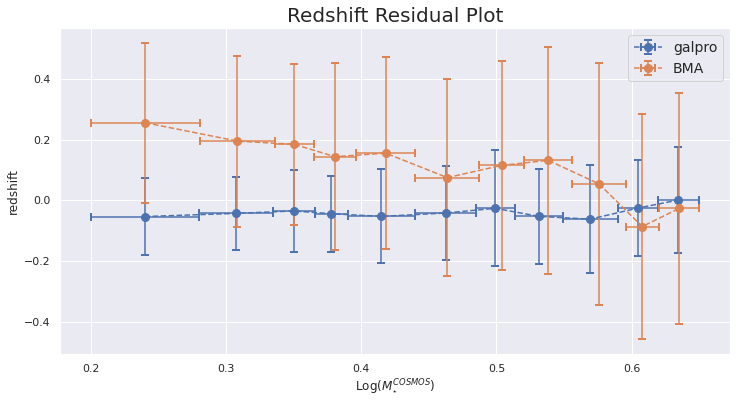

In [9]:
fig, axis = plt.subplots(1, 1, figsize=(12,6))

b2.plot_residual_redshift('galpro', ax = axis, scatter=0, mask = mask_2)
b1.plot_residual_redshift('BMA', ax = axis, scatter=0, mask = mask)
axis.legend(fontsize = 14)